In [1]:
import simpy, random
from queue_simulation2b import ServiceOperation, SIMULATION_DURATION, SEED

In [2]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Initializing OpenUp Queue Simulation')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

random.seed(SEED) # comment out line if not reproducing results
queue_status = []
max_queue_length = []
num_helpseekers = []
num_helpseekers_accepted_TOS = []
num_helpseekers_rejected_TOS = []
num_helpseekers_served = []
num_helpseekers_served_g_regular = []
num_helpseekers_served_g_repeated = []
num_helpseekers_reneged = []
# num_helpseekers_reneged_g_regular = []
# num_helpseekers_reneged_g_repeated = []
num_available_counsellor_processes = []
queue_time_stats = []
renege_time_stats = []
    
for i in range(1, 1501):
    # create environment
    env = simpy.Environment() 

    # set up service operation and run simulation until  
    S = ServiceOperation(env=env)
    env.run(until=SIMULATION_DURATION)

#     print(f'Iteration #{i} ')
      
    num_helpseekers.append(S.num_helpseekers)
    num_helpseekers_accepted_TOS.append(S.num_helpseekers_TOS_accepted)
    num_helpseekers_rejected_TOS.append(S.num_helpseekers_TOS_rejected)
    max_queue_length.append(S.helpseeker_queue_max_length)
    queue_status.extend(S.queue_status)
    num_available_counsellor_processes.extend(S.num_available_counsellor_processes)
    num_helpseekers_served.append(S.served)
    num_helpseekers_served_g_regular.append(S.served_g_regular)
    num_helpseekers_served_g_repeated.append(S.served_g_repeated)
    num_helpseekers_reneged.append(S.reneged)
    queue_time_stats.append(S.queue_time_stats)
    renege_time_stats.append(S.renege_time_stats)
#     num_helpseekers_reneged_g_regular.append(S.reneged_g_regular)
#     num_helpseekers_reneged_g_repeated.append(S.reneged_g_repeated)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing OpenUp Queue Simulation
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
sns.set();

In [5]:
num_helpseekers = pd.Series(num_helpseekers, name='number of helpseekers')
num_helpseekers_accepted_TOS = pd.Series(num_helpseekers_accepted_TOS, name='number of helpseekers accepted TOS')
num_helpseekers_rejected_TOS = pd.Series(num_helpseekers_rejected_TOS, name='number of helpseekers rejected TOS')
num_helpseekers_served = pd.Series(num_helpseekers_served, name='number of helpseekers served')
num_helpseekers_served_g_regular = pd.Series(num_helpseekers_served_g_regular, name='number of users served')
num_helpseekers_served_g_repeated = pd.Series(num_helpseekers_served_g_repeated, name='number of repeated users served')
num_helpseekers_reneged = pd.Series(num_helpseekers_reneged, name='number of helpseekers reneged')
# num_helpseekers_reneged_g_regular = pd.Series(num_helpseekers_reneged_g_regular, name='number of users reneged')
# num_helpseekers_reneged_g_repeated = pd.Series(num_helpseekers_reneged_g_repeated, name='number of repeated users reneged')
# queue_status = pd.Series(queue_status, name='number of instances queue exceeded four helpseekers')
max_queue_length = pd.Series(max_queue_length, name='max queue length')

In [6]:
# function to calculate classification confidence intervals
# parameter: stats - list of confidence intervals, which must be ordered
#            metadata - any string to annotate printout, can be None
# precondition - metadata must be a string or None, and stats must be a list
#                  The check is commented out for now as asserts should 
#               be done outside function
# returns: cutoff values at 2.5% and 95% percentiles
def calculate_confidence_intervals(stats, metadata=None):
    # if not isinstance(metadata, None) or \
    #     not isinstance(metadata, str) or \
    #     not isinstance(stats, list):
    #     return
        
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(stats, q_lower)
    upper_percentile = np.percentile(stats, q_upper)
    mean = np.mean(stats)
        
    print('\n%s %d%% Confidence interval:' % (
        metadata, confidence_interval) )
    print('----------------------------')
    print('%.1f%% percentile: %.5f' % (q_lower, lower_percentile) )
    print('%.1f%% percentile: %.5f\n' % (q_upper, upper_percentile) )
    print('mean value: %.5f' % mean)
    return (lower_percentile, upper_percentile, mean)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_distribution(series, filename):
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(series, q_lower)
    upper_percentile = np.percentile(series, q_upper)
    mean = np.mean(series)
    
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 5) )
    sns.distplot(series, ax=ax)
    ax.axvline(x=lower_percentile, linestyle='--' )
    ax.axvline(x=upper_percentile, linestyle='--' )
    ax.axvline(x=mean, linestyle=':', linewidth=2 )
    
    fig.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')

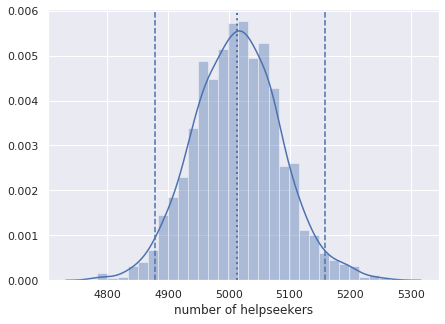

In [9]:
plot_distribution(num_helpseekers, 'num_helpseekers')

In [10]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 4879.47500
97.5% percentile: 5158.00000

mean value: 5013.77200


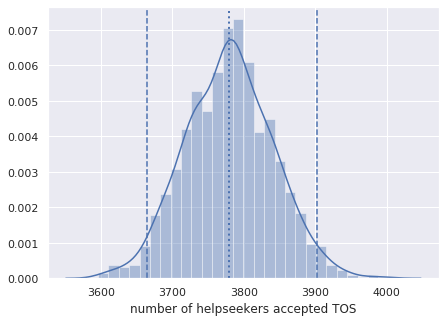

In [11]:
plot_distribution(num_helpseekers_accepted_TOS, 'num_helpseekers_accepted_TOS')

In [12]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_accepted_TOS.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 3664.47500
97.5% percentile: 3902.52500

mean value: 3779.67533


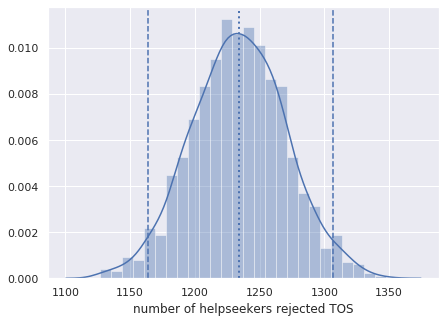

In [13]:
plot_distribution(num_helpseekers_rejected_TOS, 'num_helpseekers_rejected_TOS')

In [14]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_rejected_TOS.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 1164.00000
97.5% percentile: 1307.00000

mean value: 1234.09667


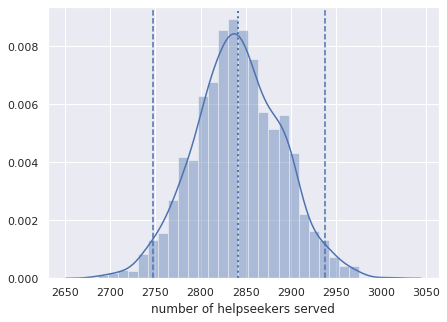

In [15]:
plot_distribution(num_helpseekers_served, 'num_helpseekers_served')

In [16]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 2747.00000
97.5% percentile: 2938.52500

mean value: 2841.48133


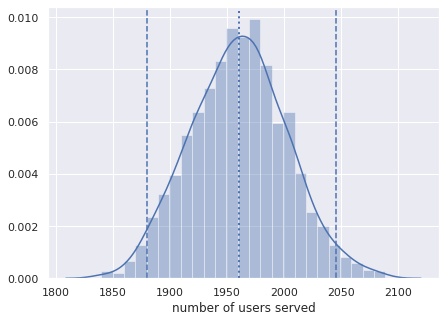

In [17]:
plot_distribution(num_helpseekers_served_g_regular, 'num_helpseekers_served_g_regular')

In [18]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_regular.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 1880.00000
97.5% percentile: 2046.00000

mean value: 1960.57800


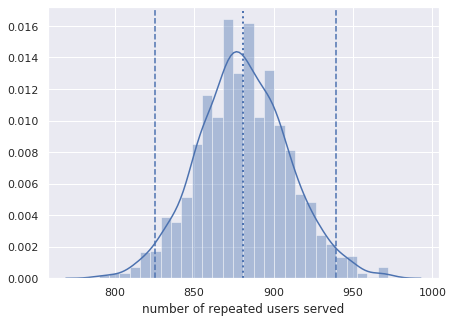

In [19]:
plot_distribution(num_helpseekers_served_g_repeated, 'num_helpseekers_served_g_repeated')

In [20]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_repeated.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 825.47500
97.5% percentile: 939.52500

mean value: 880.90333


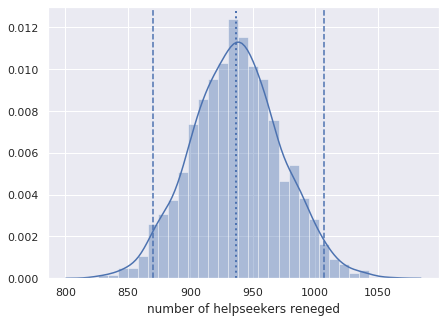

In [21]:
plot_distribution(num_helpseekers_reneged, 'num_helpseekers_reneged')

In [22]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_reneged.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 870.00000
97.5% percentile: 1007.00000

mean value: 936.96600


In [23]:
# plot_distribution(num_helpseekers_reneged_g_regular, 'num_helpseekers_reneged_g_regular')

In [24]:
# lower, upper, mean = calculate_confidence_intervals(
#     num_helpseekers_reneged_g_regular.sort_values().to_list() )

In [25]:
# plot_distribution(num_helpseekers_reneged_g_repeated, 'num_helpseekers_reneged_g_repeated')

In [26]:
# lower, upper, mean = calculate_confidence_intervals(
#     num_helpseekers_reneged_g_repeated.sort_values().to_list() )

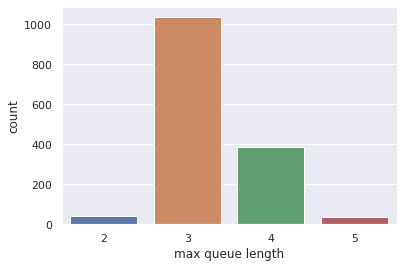

In [27]:
max_queue_length_count = sns.countplot(x='max queue length', data=max_queue_length.to_frame())

max_queue_length_count.get_figure().savefig(f'max_queue_length_count.png', dpi=300, bbox_inches='tight')

In [28]:
queue_status = pd.DataFrame(queue_status, columns=['day_of_week', 'hour', 'queue_length'])

In [29]:
queue_status['hour'] = queue_status['hour'].str.replace('hour:', '').astype(int)

In [30]:
queue_status['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [31]:
queue_status['queue_length'] = queue_status['queue_length'].str.replace('queue_length:', '').astype(int)

In [32]:
queue_status

,day_of_week,hour,queue_length
0,Sunday,0,0
1,Sunday,0,0
2,Sunday,0,0
3,Sunday,0,0
4,Sunday,0,0
...,...,...,...
5668945,Monday,23,1
5668946,Monday,23,0
5668947,Monday,23,1
5668948,Monday,23,0


In [33]:
queue_status['total']=1

In [34]:
totals = queue_status.groupby(
    ['day_of_week', 'hour', 'queue_length']).sum()

In [35]:
totals = totals.reset_index()

In [36]:
totals

,day_of_week,hour,queue_length,total
0,Friday,0,0,54183
1,Friday,0,1,505
2,Friday,0,2,65
3,Friday,0,3,4
4,Friday,0,4,1
...,...,...,...,...
587,Wednesday,23,1,11754
588,Wednesday,23,2,1931
589,Wednesday,23,3,214
590,Wednesday,23,4,21


In [37]:
totals = pd.pivot_table(totals, values='total', columns=['queue_length'],
              index=['day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [38]:
totals_percent = (((totals.T/totals.T.sum()).T)*100)#.round(2)

totals_percent

In [39]:
totals_percent

queue_length              0          1         2         3         4         5
day_of_week hour                                                              
Friday      0     98.949925   0.922240  0.118704  0.007305  0.001826  0.000000
            1     93.152339   6.146457  0.652403  0.046233  0.002569  0.000000
            2     93.839886   5.606738  0.529052  0.024324  0.000000  0.000000
            3     97.161367   2.676669  0.153440  0.008524  0.000000  0.000000
            4     97.892250   1.944217  0.149905  0.009085  0.004543  0.000000
...                     ...        ...       ...       ...       ...       ...
Wednesday   19    99.977117   0.022883  0.000000  0.000000  0.000000  0.000000
            20    99.959472   0.040528  0.000000  0.000000  0.000000  0.000000
            21    87.147064  11.016802  1.671575  0.151568  0.010826  0.002165
            22    73.804047  22.482011  3.372091  0.314419  0.025322  0.002110
            23    72.230201  23.447038  3.851985  0.426890  0.041891  0.001995

[168 rows x 6 columns]

In [40]:
totals_percent2 = totals_percent.reset_index()

In [41]:
totals_percent2['day_int'] = totals_percent2['day_of_week'].map({
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4
})

In [42]:
totals_percent2 = totals_percent2.sort_values(
    by=['day_int', 'hour']).reset_index(drop=True).set_index(
    ['day_of_week', 'hour']).drop(columns=['day_int'])

In [43]:
totals_percent2

queue_length              0          1         2         3         4         5
day_of_week hour                                                              
Sunday      0     98.443197   1.353122  0.182315  0.019941  0.001424  0.000000
            1     90.538265   8.362754  1.004834  0.085094  0.009053  0.000000
            2     91.670688   7.498479  0.769989  0.060844  0.000000  0.000000
            3     92.796194   6.482785  0.665557  0.053330  0.002133  0.000000
            4     96.899496   2.946529  0.146976  0.006999  0.000000  0.000000
...                     ...        ...       ...       ...       ...       ...
Saturday    19    99.931792   0.066259  0.001949  0.000000  0.000000  0.000000
            20    99.929358   0.070642  0.000000  0.000000  0.000000  0.000000
            21    89.411297   9.403345  1.078502  0.106856  0.000000  0.000000
            22    72.137950  23.642934  3.786284  0.401064  0.029782  0.001985
            23    71.291429  24.081905  4.095238  0.474286  0.049524  0.007619

[168 rows x 6 columns]

In [44]:
totals_percent2['2_or_above'] = 0
for i in totals_percent2.columns[2:]:
    totals_percent2['2_or_above'] += totals_percent2[i]

In [45]:
totals_percent2.reset_index(inplace=True)

In [46]:
totals_percent2['new_ind'] = totals_percent2['day_of_week'] + '_'+ totals_percent2['hour'].astype(str)

In [47]:
totals_percent3 = totals_percent2.set_index('new_ind')[[0, 1, '2_or_above']].copy()

In [48]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# modify matplotlib and seaborn settings
# to display Chinese 
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['font.weight'] = 'medium'

sns.set(font=['sans-serif'])
sns.set_style('dark',{'font.sans-serif':['Noto Serif CJK JP']})
sns.set_context('talk')

In [49]:
# fig, ax = plt.subplots(figsize=(10, 100) )


# sns.heatmap(totals_percent, annot=True, ax=ax, annot_kws={"size": 12}, 
#     cmap=sns.diverging_palette(220, 10, sep=80, n=255)
# );
# fig.suptitle('Queue Length Probabilities by\nthe day of the week and hour\n'
#              '#Social Worker(s) × #sim chats max: 2 × 4,\n'
#              '#Duty Officer(s) × #sim chats max: 1 × 1,\n'
#              '#Volunteer(s) × #sim chats max: 2 × 1',
#     fontsize=24, weight='heavy',
#     fontweight=1000, y=.9)
# plt.subplots_adjust(bottom=0.2)

# # workaround from https://github.com/mwaskom/seaborn/issues/1773
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

# fig.savefig(f'queue_output/Queue_SW_24_DO_11_V_21.png', dpi=300, bbox_inches='tight')

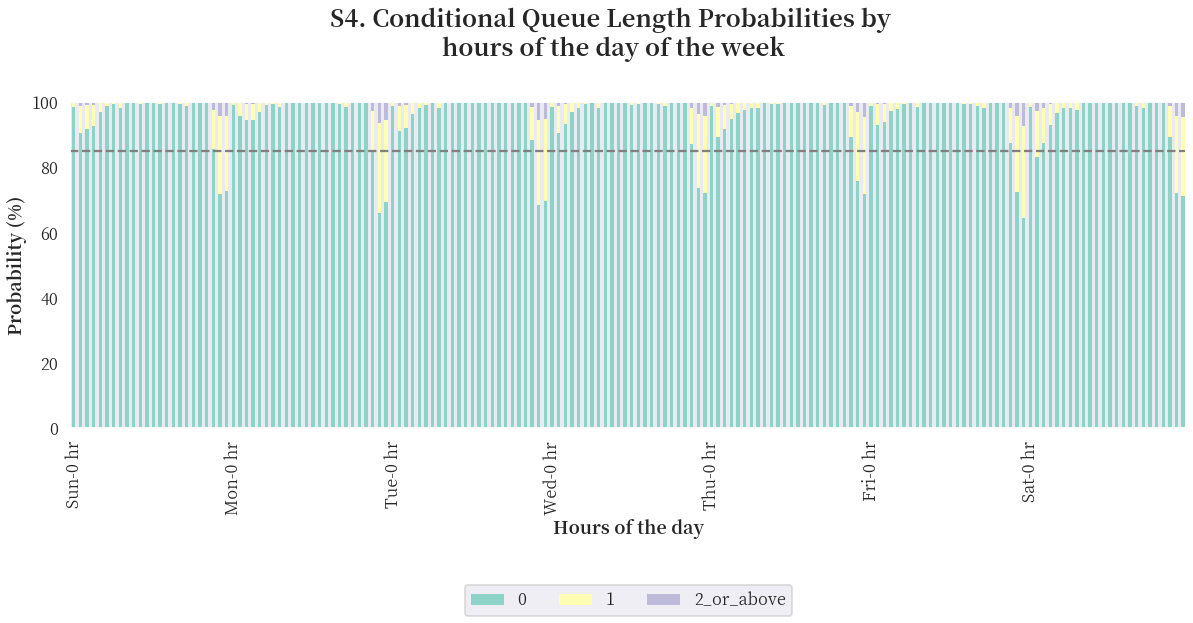

In [50]:
fig, ax = plt.subplots(figsize=(20,6) )
palette = sns.color_palette("Set3")

fig.suptitle('S4. Conditional Queue Length Probabilities by\n hours of the day of the week',
    fontsize=24, weight='heavy',
    fontweight=1000, y=1.1)

totals_percent3.plot.bar(
    stacked=True,
    ax=ax,
    linewidth=.01,
    color=palette
)

ax.axhline(y=85, linestyle='--', color='grey')
ax.set_xticklabels(labels=[f'{x[:3]}-{x[-1]} hr' 
    if x[-2:] == '_0' else ''
    for x in totals_percent3.index])

ax.set_xlabel('Hours of the day')
ax.set_ylabel('Probability (%)')



ax.set_ylim(0,100)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.6), ncol=3)
fig.savefig(f'queue_output/Queue_SW_283_DO_11_V_102.png', dpi=300, bbox_inches='tight')

In [51]:
# queue_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
#     col_order=['Sunday',
#         'Monday',
#         'Tuesday',
#         'Wednesday',
#         'Thursday',
#         'Friday',
#         'Saturday'],
#     data=queue_status, kind="count",
#     height=4, aspect=1);
# queue_plot.savefig(f'queue_blowup.png', dpi=300, bbox_inches='tight')

In [52]:
queue_time_stats[0]

[('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:0', 'time_spent_in_queue:1.6945927891785004'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:1', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:2', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:2', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:2', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:2', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:3', 'time_spent_in_queue:0.0'),
 ('weekday:0', 'hour:3', 'time_

In [53]:
queue_time_stats = pd.DataFrame(queue_time_stats[0], columns=['day_of_week', 'hour', 'queue_time'])

In [54]:
queue_time_stats['hour'] = queue_time_stats['hour'].str.replace('hour:', '').astype(int)

In [55]:
queue_time_stats['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [56]:
queue_time_stats

,day_of_week,hour,queue_time
0,Sunday,0,time_spent_in_queue:0.0
1,Sunday,0,time_spent_in_queue:0.0
2,Sunday,0,time_spent_in_queue:0.0
3,Sunday,0,time_spent_in_queue:0.0
4,Sunday,0,time_spent_in_queue:0.0
...,...,...,...
2806,Monday,21,time_spent_in_queue:0.0
2807,Monday,21,time_spent_in_queue:0.0
2808,Monday,21,time_spent_in_queue:0.0
2809,Monday,21,time_spent_in_queue:0.0


In [57]:
queue_time_stats['queue_time'] = queue_time_stats['queue_time'].str.replace(
    'time_spent_in_queue:', '').astype(float)

In [58]:
queue_time_stats

,day_of_week,hour,queue_time
0,Sunday,0,0.0
1,Sunday,0,0.0
2,Sunday,0,0.0
3,Sunday,0,0.0
4,Sunday,0,0.0
...,...,...,...
2806,Monday,21,0.0
2807,Monday,21,0.0
2808,Monday,21,0.0
2809,Monday,21,0.0


In [59]:
queue_time_stats['total']=1

In [60]:
# totals = 
queue_time_stats.mean()

hour          11.279260
queue_time     0.035112
total          1.000000
dtype: float64

In [61]:
queue_time_stats['queue_time_group'] = queue_time_stats['queue_time'].apply(lambda x: '<=5 minutes' if x<=5 else '>5 minutes')

In [62]:
queue_time_stats['queue_time_group']

0       <=5 minutes
1       <=5 minutes
2       <=5 minutes
3       <=5 minutes
4       <=5 minutes
           ...     
2806    <=5 minutes
2807    <=5 minutes
2808    <=5 minutes
2809    <=5 minutes
2810    <=5 minutes
Name: queue_time_group, Length: 2811, dtype: object

In [63]:
queue_time_stats = pd.pivot_table(queue_time_stats, values='total', columns=['queue_time_group'],
              index=['day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [64]:
queue_time_stats

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Friday      0              40           0
            1              19           0
            2              12           1
            3              12           0
            4               7           0
...                       ...         ...
Wednesday   17             27           0
            18             19           0
            19             18           0
            20             21           0
            21             22           0

[154 rows x 2 columns]

In [65]:
queue_time_stats_percent = (((queue_time_stats.T/queue_time_stats.T.sum()).T)*100)#.round(2)

In [66]:
queue_time_stats

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Friday      0              40           0
            1              19           0
            2              12           1
            3              12           0
            4               7           0
...                       ...         ...
Wednesday   17             27           0
            18             19           0
            19             18           0
            20             21           0
            21             22           0

[154 rows x 2 columns]

In [67]:
queue_time_stats2 = queue_time_stats_percent.reset_index()

In [68]:
queue_time_stats2['day_int'] = queue_time_stats2['day_of_week'].map({
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4
})

In [69]:
queue_time_stats2 = queue_time_stats2.sort_values(
    by=['day_int', 'hour']).reset_index(drop=True).set_index(
    ['day_of_week', 'hour']).drop(columns=['day_int'])

In [70]:
queue_time_stats2

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Sunday      0           100.0         0.0
            1           100.0         0.0
            2           100.0         0.0
            3           100.0         0.0
            4           100.0         0.0
...                       ...         ...
Saturday    17          100.0         0.0
            18          100.0         0.0
            19          100.0         0.0
            20          100.0         0.0
            21          100.0         0.0

[154 rows x 2 columns]

In [71]:
queue_time_stats2.reset_index(inplace=True)

In [72]:
queue_time_stats2['new_ind'] = queue_time_stats2['day_of_week'] + '_'+ queue_time_stats2['hour'].astype(str)

In [73]:
queue_time_stats3 = queue_time_stats2.set_index('new_ind')[['<=5 minutes', '>5 minutes']].copy()

In [74]:
queue_time_stats3

queue_time_group,<=5 minutes,>5 minutes
new_ind,,
Sunday_0,100.0,0.0
Sunday_1,100.0,0.0
Sunday_2,100.0,0.0
Sunday_3,100.0,0.0
Sunday_4,100.0,0.0
...,...,...
Saturday_17,100.0,0.0
Saturday_18,100.0,0.0
Saturday_19,100.0,0.0


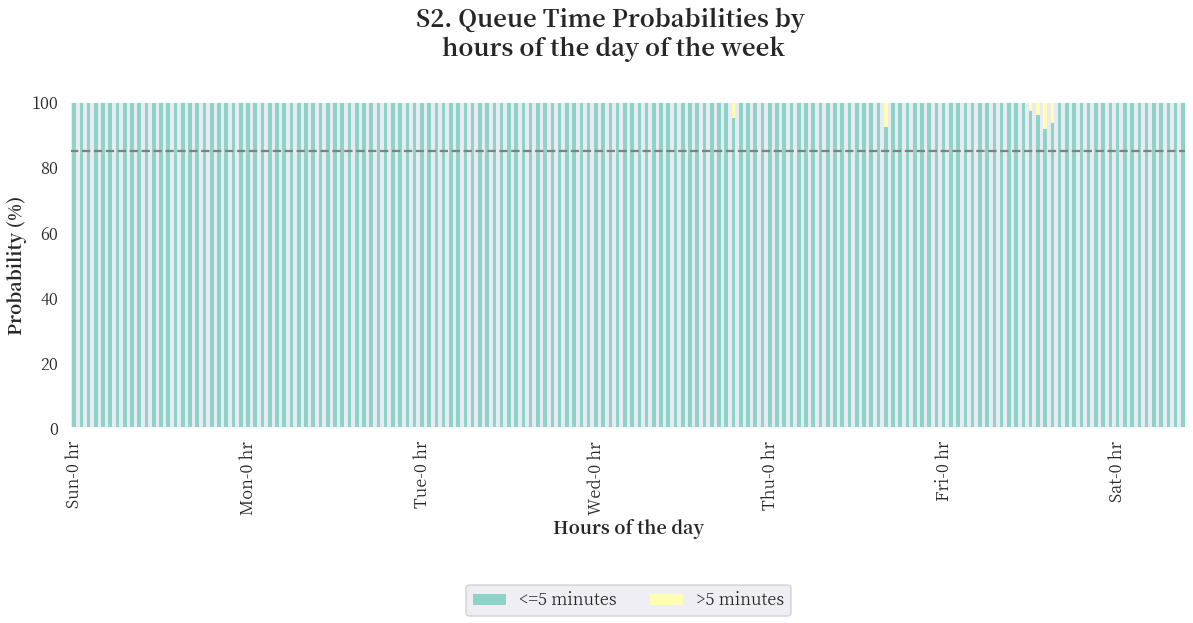

In [75]:
fig, ax = plt.subplots(figsize=(20,6) )
palette = sns.color_palette("Set3")

fig.suptitle('S2. Queue Time Probabilities by\n hours of the day of the week',
    fontsize=24, weight='heavy',
    fontweight=1000, y=1.1)

queue_time_stats3.plot.bar(
    stacked=True,
    ax=ax,
    linewidth=.01,
    color=palette
)

ax.axhline(y=85, linestyle='--', color='grey')
ax.set_xticklabels(labels=[f'{x[:3]}-{x[-1]} hr' 
    if x[-2:] == '_0' else ''
    for x in totals_percent3.index])

ax.set_xlabel('Hours of the day')
ax.set_ylabel('Probability (%)')



ax.set_ylim(0,100)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.6), ncol=2)
fig.savefig(f'queue_output/QueueTime_SW_283_DO_11_V_102.png', dpi=300, bbox_inches='tight')

# determine hours counsellors are maxed out

In [76]:
from queue_simulation import (
    MINUTES_PER_DAY, DAYS_IN_WEEK, MINUTES_PER_HOUR, 
    MAX_SIMULTANEOUS_CHATS_SOCIAL_WORKER,
    MAX_SIMULTANEOUS_CHATS_DUTY_OFFICER,
    MAX_SIMULTANEOUS_CHATS_VOLUNTEER,)

In [77]:
MAX_SIMULTANEOUS_CHATS_VOLUNTEER

1

In [78]:
MAX_SIMULTANEOUS_CHATS_DUTY_OFFICER

1

In [79]:
MAX_SIMULTANEOUS_CHATS_SOCIAL_WORKER

3

In [80]:
df2 = pd.DataFrame(num_available_counsellor_processes, columns=['time', 'num_counsellor_processes_idle'])

In [81]:
df2['time_int'] = df2['time'].astype(int)

In [82]:
df2['current_day_minutes'] = df2['time_int'] % MINUTES_PER_DAY

In [83]:
df2['weekday'] = (df2['time_int'] / MINUTES_PER_DAY).astype(int) % DAYS_IN_WEEK

In [84]:
df2['hour'] = (df2['current_day_minutes'] / MINUTES_PER_HOUR).astype(int)

In [85]:
df2['day_of_week'] = df2['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [86]:
df2['total']=1

In [87]:
df2

,time,num_counsellor_processes_idle,time_int,current_day_minutes,weekday,hour,day_of_week,total
0,10.927214,30,10,10,0,0,Sunday,1
1,15.172662,29,15,15,0,0,Sunday,1
2,15.902339,28,15,15,0,0,Sunday,1
3,33.650608,27,33,33,0,0,Sunday,1
4,34.661327,26,34,34,0,0,Sunday,1
...,...,...,...,...,...,...,...,...
5668945,43166.029353,35,43166,1406,1,23,Monday,1
5668946,43167.356532,35,43167,1407,1,23,Monday,1
5668947,43175.387872,35,43175,1415,1,23,Monday,1
5668948,43175.728967,35,43175,1415,1,23,Monday,1


In [88]:
df2 = pd.pivot_table(df2, values='total', columns=['num_counsellor_processes_idle'],
              index=['weekday', 'day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [89]:
df2 = (((df2.T/df2.T.sum()).T)*100)#.round(2)

In [90]:
df2

num_counsellor_processes_idle        0          1          2          3   \
weekday day_of_week hour                                                   
0       Sunday      0          0.000000   0.000000   0.000000   0.000000   
                    1          9.148516  62.638278  14.933102   8.328354   
                    2          9.176930  64.376980  15.685123   7.422949   
                    3          7.741371  63.479671  16.291224   8.524254   
                    4          4.951708  50.661394  21.665034  13.994261   
...                                 ...        ...        ...        ...   
6       Saturday    19         0.000000   0.000000   0.000000   0.000000   
                    20         0.000000   0.000000   0.000000   0.000000   
                    21         0.000000   0.000000   0.000000   0.000000   
                    22         0.000000   0.000000   0.000000   0.000000   
                    23         0.000000   0.000000   0.000000   0.000000   

num_counsellor_processes_idle        4         5         6    7    8    9   \
weekday day_of_week hour                                                     
0       Sunday      0          0.000000  0.000000  0.000000  0.0  0.0  0.0   
                    1          3.646371  1.111654  0.193725  0.0  0.0  0.0   
                    2          2.651952  0.623125  0.062942  0.0  0.0  0.0   
                    3          3.103801  0.761551  0.098127  0.0  0.0  0.0   
                    4          6.550952  1.942189  0.234462  0.0  0.0  0.0   
...                                 ...       ...       ...  ...  ...  ...   
6       Saturday    19         0.000000  0.000000  0.000000  0.0  0.0  0.0   
                    20         0.000000  0.000000  0.000000  0.0  0.0  0.0   
                    21         0.000000  0.000000  0.000000  0.0  0.0  0.0   
                    22         0.000000  0.000000  0.000000  0.0  0.0  0.0   
                    23         0.000000  0.000000  0.000000  0.0  0.0  0.0   

num_counsellor_processes_idle  ...        53        54        55        56  \
weekday day_of_week hour       ...                                           
0       Sunday      0          ...  0.000000  0.000000  0.000000  0.000000   
                    1          ...  0.000000  0.000000  0.000000  0.000000   
                    2          ...  0.000000  0.000000  0.000000  0.000000   
                    3          ...  0.000000  0.000000  0.000000  0.000000   
                    4          ...  0.000000  0.000000  0.000000  0.000000   
...                            ...       ...       ...       ...       ...   
6       Saturday    19         ...  0.000000  0.000000  0.000000  0.000000   
                    20         ...  0.045822  0.013365  0.000000  0.000000   
                    21         ...  5.454636  6.249845  6.376581  5.690713   
                    22         ...  0.000000  0.000000  0.000000  0.000000   
                    23         ...  0.000000  0.000000  0.000000  0.000000   

num_counsellor_processes_idle        57        58        59        60  \
weekday day_of_week hour                                                
0       Sunday      0          0.000000  0.000000  0.000000  0.000000   
                    1          0.000000  0.000000  0.000000  0.000000   
                    2          0.000000  0.000000  0.000000  0.000000   
                    3          0.000000  0.000000  0.000000  0.000000   
                    4          0.000000  0.000000  0.000000  0.000000   
...                                 ...       ...       ...       ...   
6       Saturday    19         0.000000  0.000000  0.000000  0.000000   
                    20         0.000000  0.000000  0.000000  0.000000   
                    21         4.813499  3.389578  1.843891  0.782784   
                    22         0.000000  0.000000  0.000000  0.000000   
                    23         0.000000  0.000000  0.000000  0.000000   

num_counsellor_processes_idle  

In [91]:
df2 = df2.reset_index(drop=False).drop(columns=['weekday'])
selection = df2[df2['day_of_week']=='Monday'].copy()

In [92]:
selection.set_index(['day_of_week', 'hour'])

num_counsellor_processes_idle        0          1          2          3   \
day_of_week hour                                                           
Monday      0                  0.000000   0.000000   0.000000   0.000000   
            1                  4.668794  45.761858  19.673232  15.335525   
            2                  5.985448  56.658965  19.094440  11.353916   
            3                  6.208732  56.344240  19.402286  11.380211   
            4                  4.672404  49.032216  21.861707  14.653609   
            5                  2.487377  31.235716  22.498007  21.179910   
            6                  1.127582  20.733900  20.063183  23.557716   
            7                  0.036221   1.579252   3.455520   6.353231   
            8                  0.046522   1.837637   5.427619  13.600062   
            9                  0.238351   7.680849  11.560005  19.932070   
            10                 0.348724   6.718743   8.225229  11.851955   
            11                 0.094121   1.469736   2.425427   4.847234   
            12                 0.127207   2.628941   3.773803   7.393416   
            13                 0.456388   4.650953   5.764900   9.289896   
            14                 0.000000   0.002735   0.166822   0.503200   
            15                 0.039148   1.921033   2.460712   4.443264   
            16                 0.522483   7.913764   8.180283  11.890437   
            17                 0.000000   0.000000   0.000000   0.000000   
            18                 0.000000   0.000000   0.000000   0.000000   
            19                 0.000000   0.000000   0.000000   0.000000   
            20                 0.000000   0.000000   0.000000   0.000000   
            21                 0.000000   0.000000   0.000000   0.000000   
            22                 0.000000   0.000000   0.000000   0.000000   
            23                 0.000000   0.000000   0.000000   0.000000   

num_counsellor_processes_idle         4          5          6          7   \
day_of_week hour                                                            
Monday      0                   0.000000   0.000000   0.000000   0.000000   
            1                   9.603896   4.047408   0.909287   0.000000   
            2                   5.147240   1.504351   0.255641   0.000000   
            3                   4.991623   1.458559   0.214349   0.000000   
            4                   7.241072   2.159792   0.379200   0.000000   
            5                  14.631943   6.537337   1.429710   0.000000   
            6                  19.873633  11.484812   3.159174   0.000000   
            7                  13.097653  22.486236  24.072733   2.803535   
            8                  25.796697  32.619989  20.671474   0.000000   
            9                  26.004052  23.584793  10.999881   0.000000   
            10                 14.181429  13.679267  12.223927  11.670619   
            11                  8.673617  14.194179  19.175355  20.388068   
            12                 11.425488  16.436666  18.872870  18.344769   
            13                 13.442426  16.907371  18.387629  15.643297   
            14                  1.402943   2.879724   5.461358   8.321938   
            15                  7.821151  11.565349  14.353224  14.397964   
            16                 15.376293  17.368588  16.104602  12.217648   
            17                  0.000000   0.000000   0.000000   0.000000   
            18                  0.000000   0.000000   0.000000   0.000000   
            19                  0.000000   0.000000   0.000000   0.000000   
            20                  0.000000   0.000000   0.000000   0.000000   
            21                  0.000000   0.000000   0.000000   0.000000   
            22                  0.000000   0.000000   0.000000   0.000000   
            23                  0.000000   0.000000   0.000000   0.000000   

num_counsellor_proce

In [93]:
selection.set_index(['day_of_week', 'hour']).to_excel(
    'queue_output/num_idle_procs_SW_283_DO_11_V_102.xlsx')

# Number of instances when one/no counsellor is available (1500 simulations, seed=728, four or less processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']<=2], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot.png', dpi=300, bbox_inches='tight')

# Number of instances when at least two counsellors are idle (1500 simulations, seed=728, eight or more processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']>=8], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot_2.png', dpi=300, bbox_inches='tight')